# Курсовая работа
## Постановка задачи
Построить экспоненциальный сплайн для функции, заданной в узлах интерполяции. Осуществить выбор оптимальных параметров натяжения. Сравнить полученные рузультаты с интерполяцией кубическими сплайнами. 

## Описание
### Экспоненциальный сплайн

Кубический сплайн имеет прямую аналогию в теории упругости, а именно описывает поведение гибкого стрежня, закрепленного в некоторых точках. С этой точки зрения, кубический сплайн $s$ на каждом интервале $[x_i, x_{i+1}]$, $i = 1, \ldots, N$ является решением следующей краевой задачи:
$$[D^4]s = 0,\ s(x_i) = f_i,\ s(x_{i+1}) = f_{i+1},\ s''(x_i) = s''_i,\ s''(x_{i+1}) = s''_{i+1}$$
Где $s''_i$ и $s''_{i+1}$ подобраны так, чтобы $s \in C^2[a,b]$, и получаются как решение системы с трехдиагональной матрицей.

Полученный таким образом сплайн имеет склонность к образованию точек перегиба независимо от того, соответствует ли это исходным данным или нет. Точки перегиба, возникающие вследствие нежелательных колебаний интерполяционной кривой, называют ложными точками перегиба.

Во избежании таких точек, наложим постоянное \enquote{натяжение} на интервалы, где они появляется. Определим экспоненциальный сплайн $\tau$ как решение совокупности краевых задач на интервалах $[x_i, x_{i+1}]$, $i = 1, \ldots, N$ вида:
$$[D^4 - p^2_i D^2]\tau = 0,\ \tau(x_i) = f_i,\ \tau(x_{i+1}) = f_{i+1},\ \tau''(x_i) = \tau''_i,\ \tau''(x_{i+1}) = \tau''_{i+1}$$
Где $p_i$, $i = 1, \ldots, N$ --- параметр натяжения.

При этом имеется два предельных случая:

1. $p_i \rightarrow 0 \ \Rightarrow \ [D^4 - p^2_i D^2]\tau = 0 \ \Rightarrow \ [D^4]\tau = 0$. Экспоненциальный сплайн вырождается в кубический сплайн.

2. $p_i \rightarrow \infty \ \Rightarrow \ [D^4 - p^2_i D^2]\tau = 0 \ \Rightarrow \ [(1/p^2_i)D^4 - D^2]\tau = 0 \ \Rightarrow \ [D^2]\tau = 0$. Экспоненциальный сплайн вырождается в сплайн первого порядка --- ломаную линию.


На интервале $[x_i, x_{i+1}]$, $i = 1, \ldots, N$ экспоненциальный сплайн задается формулой
$$\tau(x) = \frac{1}{p_i^2 S_i}\Big[\tau''_i \sh(p_i(x_{i+1} - x)) + \tau''_{i+1} \sh(p_i(x - x_i))\Big] + 
\left(f_i - \frac{\tau''_i}{p_i^2}\right)\frac{x_{i+1}-x}{h_i} + 
\left(f_{i+1} - \frac{\tau''_{i+1}}{p_i^2}\right)\frac{x-x_i}{h_i}$$

Где $f_i$, $i = 1, \ldots, N+1$ --- значения функции в узлах интерполяции;\\
$h_i = x_{i+1} - x_i$,  $S_i = \sinh(p_i h_i)$, $i = 1, \ldots, N$;\\
$\tau''_i$ определяются решением системы уравнений с трехдиагональной матрицей:
$$
\begin{cases}
d_1 \tau''_1 = b_1 \\
e_{i-1} \tau''_{i-1} + (d_{i-1} + d_i)\tau''_i + e_i \tau''_{i+1} = b_i,\ (i = 2, \ldots, N) \\
d_N \tau''_{N+1} = b_{N+1}
\end{cases}
$$
Где:
\begin{align*} 
e_i &= \left(\frac{1}{h_i} - \frac{p_i}{S_i}\right) /p^2_i & \\
d_i &= \left(p_i \frac{C_i}{S_i} - \frac{1}{h_i}\right)/p^2_i & i = 1, \ldots, N\\
C_i &= \cosh(p_i h_i) & \\
\\
b_1 &= b_{N+1} = 0 & \\
b_i &= \frac{f_{i+1} - f_i}{h_i} - \frac{f_i - f_{i-1}}{h_{i-1}} & i = 2, \ldots, N \\
\end{align*} 

Данная система соответствует сплайну с естественными граничными условиями ($\tau''_1 = \tau''_{N+1} = 0$).

### Выбор параметров натяжения

Отдельный интерес представляет задача выбора параметра натяжения для каждого из интервалов интерполяции, достаточного для устранения ложных точек перегиба.
Ложные точки перегиба однозначно устраняются при \enquote{достаточно больших} значениях параметра, но это также приводит к появлению областей большой кривизны вблизи узлов.

Отсутствие точек перегиба на интервале $[x_i, x_{i+1}]$ означает постоянство знака второй производной $\tau''$. Тогда условия $\tau''_ib_i > 0$, $\tau''_{i+1}b_{i+1} > 0$ являются необходимыми и достаточными для этого. Таким образом появляется возможность итеративно изменять параметр $p_i$ до достижения условия $\tau''_ib_i > 0$ $i = 1, \ldots, N+1$.

Так как рассматривается только естественный сплайн ($\tau''_1 = \tau''_{N+1} = 0$), ограничим рассмотрение точками $i = 2, \ldots, N$. Пусть для некоторого набора параметров $p^{(n)}_i$, $i = 1, \ldots, N$, выполняется $\tau''_kb_k < 0$, $k \in [2, N]$. 
Обозначим $$\overline{\lambda} = \frac{\max(|b_k|, (d_{k-1} + d_k) |\tau''_k|)}{2 \max(|\tau''_{k-1}|, |\tau''_{k+1}|)}$$
и положим $\tilde{p_i} = (\overline{\lambda} h_i)^{-1/2}$, $i = k-1, k$ (или возможно $\tilde{p_i} = \max(p^{(n)}_i, (\overline{\lambda} h_i)^{-1/2})$, если необходимо только увеличивать параметр).

Для получения следующих значений параметров натяжения применим механизм релаксации: $$p^{(n+1)} = p^{(n)} + \omega (\tilde{p} - p^{(n)})$$

Данный итеративный процесс позволяет дополнительно \enquote{натянуть} сплайн в интервалах с ложными точками перегиба, при этом он не всегда помогает бороться с ложными экстремумами.

## Исполнение задачи
### Сравнение
Для начала давайте подоготовим кубический сплайн. Его мы будем использовать для сравнения с нашим экспоненциальным сплайном.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve

In [2]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [3]:
# Вспомогательные функции

#TRIDIAGONAL_MATRIX_ALGORITHM
def TDMAsolver(A, _d) -> np.array:
    n = len(_d)
    a = []
    b = []
    c = []
    d = _d
    ACopy = A

    a.append(0)
    b.append(ACopy[0][0])
    c.append(ACopy[0][1])
    for i in range(1, n - 1):
        a.append(ACopy[i][i - 1])
        b.append(ACopy[i][i])
        c.append(ACopy[i][i + 1])

    a.append(ACopy[n - 1][n - 2])
    b.append(ACopy[n - 1][n - 1])
    c.append(0)

    # creating P and Q
    p = [-c[0]/b[0]]
    q = [d[0]/b[0]]
    for i in range(1, n - 1):
        p.append(- c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))

    #ans
    ans = np.zeros(n)
    ans[n - 1] = (d[n - 1] - a[n - 1] * q[n - 2]) / (b[n - 1] + a[n - 1] * p[n - 2])

    for i in range(n - 2, -1, -1):
        ans[i] = p[i] * ans[i + 1] + q[i]

    return ans

In [4]:
class cubic_spline:
    """Класс для построения кубического сплайна.
    На вход констроктору передаются:
        X_i -- координата х точки интерполяции
        f_i -- координата у точки интерполяции
        n -- количество точек. ВНИМАНИЕ: 0-индекация
        points = 100 -- точность рисования сплайна

    Methods:
        print_spline(title) -- метод построения полученного сплайна
    """
    def __init__(self, X_i, f_i, points=100) -> None:
        self.success = False # переменная правильной сборки сплайна
        self.Xi = X_i
        self.Yi = f_i
        if len(X_i) != len(f_i):
            print(f"{bcolors.FAIL}Неправильная размерность точек. Длины массивов X_i и f_i не совпадают {bcolors.ENDC}")
            return 
        
        n = len(X_i) - 1

        # нужно, для 1-ой индексации
        h = [0]
        for i in range(1, len(X_i)):
            h.append(X_i[i] - X_i[i - 1])
        
        #начнем инициализировать нашу систему 
        A = [[2 * (h[1] + h[2]) , h[2] , 0]]
        _d = [3 * ((f_i[2] - f_i[1]) / h[2]  - (f_i[1] - f_i[0]) / h[1] )]

        #заполним часть системы для i = 3 ... n-1
        for i in range(3, n):
            next_row_A = [0]*len(A[0])
            next_row_A[i-3] = h[i-1]
            next_row_A[i-2] = 2*(h[i-1] + h[i])
            next_row_A[i-1] = h[i]
            A.append(next_row_A)

            _d.append(3 * ((f_i[i] - f_i[i - 1]) / h[i]  - (f_i[i - 1] - f_i[i - 2]) / h[i-1]))

        #заполним часть системы для i = n
        next_row_A = [0]*len(A[0])
        next_row_A[-1] = 2 * (h[n - 1] + h[n])
        next_row_A[-2] = h[n - 1]
        A.append(next_row_A)

        _d.append(3 * ((f_i[n] - f_i[n - 1]) / h[n]  - (f_i[n - 1] - f_i[n - 2]) / h[n-1]))

        c = [0] + TDMAsolver(A,_d).tolist()
        a = f_i[:-1]

        b = [ (f_i[i] - f_i[i - 1])/h[i] - (1/3) * h[i] * (c[i] + 2 * c[i - 1]) for i  in range(1, n)]
        b.append((f_i[n] - f_i[n - 1])/h[n] - (2/3) * h[n] * c[n - 1] )

        d = [ (c[i] - c[i - 1]) / (3 * h[i]) for i  in range(1, n)]
        d.append( -c[n - 1] / (3 * h[n]))

        self.X = np.linspace(X_i[0], X_i[-1], num = points)
        self.Y = [self._S_(x, a, b, c, d, X_i) for x in self.X]

        self.success = True

    def _S_(self, x, a, b, c, d, X):
        """Функция уравнения кубического сплайна. См. ЛР3 часть 2"""
        for i in range(1, len(X)):
            if x >= X[i - 1] and x <= X[i]:
                return a[i-1] + b[i-1] * (x - X[i - 1]) + c[i-1] * (x - X[i - 1])**2 + d[i-1] * (x - X[i - 1])**3
    
    def print_spline(self, title=''):
        """Функция построения графика для визуализации получившегося кубического сплайна

        Args:
            Xi (list): Список значений для x_i из таблицы варианта для построения точек
            Yi (list): Список значений для f_i из таблицы варианта для построения точек
            X (list): Список значений X для получившегося многочлена
            Y (list): Список значений Y для получившегося многочлена
            t1 (str, optional): Название графика. Defaults to ''.
        """
        if not self.success:
            print(f"{bcolors.WARNING}print_spline: сплайн не сконфигурировался успешно {bcolors.ENDC}")
            return 
        fig = plt.figure(figsize= (6, 6))
        plt.scatter(self.Xi, self.Yi, c = 'r')
        plt.plot(self.X, self.Y, c = 'b')
        plt.title(title)
        plt.show()       

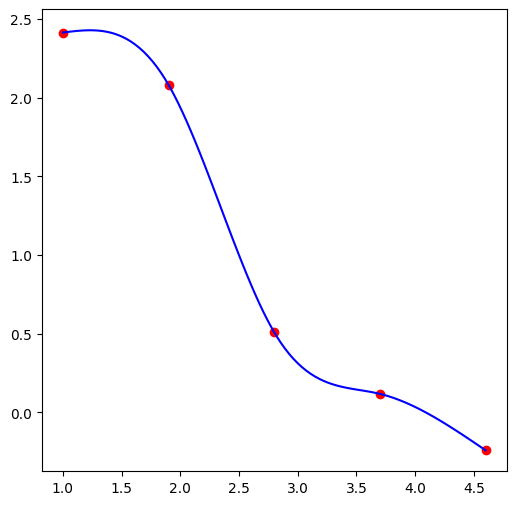

In [5]:
X_i = [1.0, 1.9, 2.8, 3.7, 4.6]
f_i = [2.4142, 2.0818, 0.50953, 0.11836, -0.24008]

spline = cubic_spline(X_i, f_i)
spline.print_spline()

### Реализация основной задачи
Теперь давайте реализуем нашу основную задачу

In [6]:
import math

In [7]:
def TDMAsolver_abc(_a,_b,_c, _d) -> np.array:
    assert len(_a) == len(_b) and len(_c) == len(_a) and len(_b) == len(_d), f"Неправильные размерности: len(a) = {len(_a)}, len(b) = {len(_b)}, len(c) = {len(_c)}, len(d) = {len(_d)}"
    n = len(_d)
    a = _a
    b = _b
    c = _c
    d = _d

    # creating P and Q
    p = [-c[0]/b[0]]
    q = [d[0]/b[0]]
    for i in range(1, n - 1):
        p.append(- c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))

    #ans
    ans = np.zeros(n)
    ans[n - 1] = (d[n - 1] - a[n - 1] * q[n - 2]) / (b[n - 1] + a[n - 1] * p[n - 2])

    for i in range(n - 2, -1, -1):
        ans[i] = p[i] * ans[i + 1] + q[i]

    return ans

In [8]:
def debug_output(str):
    print(f"{bcolors.OKCYAN}DEBUG: {bcolors.ENDC}{str}")

In [9]:
class ExponentialSpline:
    """Экспоненциальный сплайн. 
    
    На вход ему приходят точки размером n и массив сглаживания сегментов p размером n-1"""
    class Segment:
        def __init__(self, p=0, x1=0, x2=0, f1=0, f2=0, t1=0, t2=0):
            self.p = p
            self.h = abs(x1 - x2)
            self.t1 = t1
            self.t2 = t2
            self.x1 = x1
            self.x2 = x2
            self.f1 = f1
            self.f2 = f2


        def __call__(self, x) -> float:
            return ((self.t1 * math.sinh(self.p* (self.x2 - x)) + self.t2 * math.sinh(self.p * (x - self.x1))) / (self.p * self.p * math.sinh(self.p * self.h)) +
                    (self.f1 - self.t1/(self.p * self.p)) * (self.x2 - x)/ self.h +
                    (self.f2 - self.t2/(self.p * self.p)) * (x - self.x1)/ self.h)

        def __str__(self):
            return f"""(({self.t1} * sinh({self.p} * ({self.x2} - x)) + {self.t2} * sinh({self.p} * (x - {self.x1}))) / ({self.p} * {self.p} * sinh({self.p} * {self.h})) + ({self.f1} - {self.t1}/({self.p} * {self.p})) * ({self.x2} - x)/ {self.h} + ({self.f2} - {self.t2}/({self.p} * {self.p})) * (x - {self.x1})/ {self.h})\n\n"""
            
    def __init__(self, x, y, p):
        assert len(x) == len(y) and len(x)-1 == len(p), f"{bcolors.WARNING}WARNING:{bcolors.ENDC} Неправильные размеры массивов\n"
        assert self._check_p_(p), f"{bcolors.WARNING}WARNING:{bcolors.ENDC} Где-то в массиве p затерялся элемент <= 0.Такое невозможно"

        self.x = x
        self.y = y
        self.p = p

        self.h = np.zeros(len(x)-1)
        self.d = np.zeros(len(x)-1)
        self.e = np.zeros(len(x)-1)

        # массивы
        self.b = np.zeros(len(x))
        self.t = np.zeros(len(x))

        # наши сегменты
        self.segment = [] 

        self.Solve()

    def _check_p_(self, p) -> bool:
        for value in p:
            if value <= 0:
                return False
        return True

    def rebuild(self, x, y, p):
        self.__init__(x,y,p)

    def Solve(self):
        n = len(self.h)
        for i in range(len(self.x) - 1):
            self.h[i] = abs(self.x[i+1] - self.x[i])
            self.d[i] = ((self.p[i] * math.cosh(self.p[i]*self.h[i])/ math.sinh(self.p[i] * self.h[i]) - 1/self.h[i]) /
                        (self.p[i] * self.p[i]))
            self.e[i] = (1/ self.h[i] - self.p[i] / math.sinh(self.p[i] * self.h[i])) / (self.p[i] * self.p[i])

        # обнуляем на всякий значения b
        self.b[0] = 0
        self.b[n] = 0

        # собираем вектор b для решения трехдиагональной матрицы
        for i in range(1,n):
            self.b[i] = (self.y[i+1] - self.y[i]) / self.h[i] - (self.y[i] - self.y[i-1]) / self.h[i-1]

        # заполняем диагонали 3-х диагональной матрицы
        a,b,c = np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)
        b[0] = 1
        for i in range(1,n):
            a[i] = self.e[i-1]
            b[i] = self.d[i-1] + self.d[i]
            c[i] = self.e[i]
        b[n] = 1

        self.t = TDMAsolver_abc(a,b,c, self.b)
        self.segment = []
        for i in range(n):
            self.segment.append(self.Segment(self.p[i], self.x[i], self.x[i+1], self.y[i], self.y[i+1], self.t[i], self.t[i+1]))          

    def Tense(self, relax):
        for k in range(len(self.t) - 1):
            if self.t[k] * self.b[k] < 0:
                lama = max(abs(self.b[k]), (self.d[k-1] + self.d[k]) * abs(self.t[k])) / 2 / max(abs(self.t[k-1]), abs(self.t[k+1]))
                for i in range(k-1, k+1):
                    new_p = 1/math.sqrt(lama * self.h[i])
                    self.p[i] = self.p[i] + relax * (new_p - self.p[i])
        
        self.Solve()

    def __call__(self, val):
        assert not (val < self.x[0] or val > self.x[-1]), f"{bcolors.FAIL}FAILURE:{bcolors.ENDC} Value is out of range!\n"

        for i in range(len(self.x) - 1):
            if val >= self.x[i] and val <= self.x[i+1]:
                return self.segment[i](val)

    def __len__(self):
        return len(self.segment)

    def print_spline(self, n=100, title=''):
        X = np.linspace(self.x[0], self.x[-1], num = n)
        Y = [self.__call__(x) for x in X]

        plt.figure(figsize= (6, 6))
        plt.scatter(self.x, self.y, c = 'r')
        plt.plot(X, Y, c = 'b')
        plt.title(title)
        plt.show() 

    def __str__(self):
        result = ""
        for i in range(len(self.x) - 1):
            result += f"[{self.x[i]},{self.x[i+1]}] {self.segment[i]}"

        return result
                   

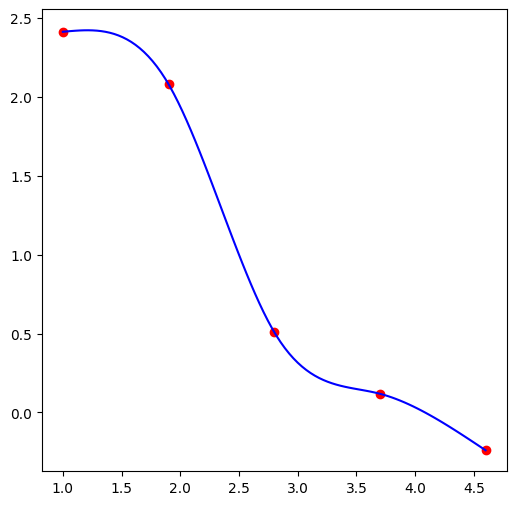

In [10]:
p = [1 for _ in range(len(X_i) - 1)]
exp_spline = ExponentialSpline(X_i, f_i, p)
exp_spline.print_spline()


In [11]:
print(exp_spline)

[1.0,1.9] ((0.0 * sinh(1 * (1.9 - x)) + -3.196441304407882 * sinh(1 * (x - 1.0))) / (1 * 1 * sinh(1 * 0.8999999999999999)) + (2.4142 - 0.0/(1 * 1)) * (1.9 - x)/ 0.8999999999999999 + (2.0818 - -3.196441304407882/(1 * 1)) * (x - 1.0)/ 0.8999999999999999)

[1.9,2.8] ((-3.196441304407882 * sinh(1 * (2.8 - x)) + 3.242650400419776 * sinh(1 * (x - 1.9))) / (1 * 1 * sinh(1 * 0.8999999999999999)) + (2.0818 - -3.196441304407882/(1 * 1)) * (2.8 - x)/ 0.8999999999999999 + (0.50953 - 3.242650400419776/(1 * 1)) * (x - 1.9)/ 0.8999999999999999)

[2.8,3.7] ((3.242650400419776 * sinh(1 * (3.7 - x)) + -0.7153577410249493 * sinh(1 * (x - 2.8))) / (1 * 1 * sinh(1 * 0.9000000000000004)) + (0.50953 - 3.242650400419776/(1 * 1)) * (3.7 - x)/ 0.9000000000000004 + (0.11836 - -0.7153577410249493/(1 * 1)) * (x - 2.8)/ 0.9000000000000004)

[3.7,4.6] ((-0.7153577410249493 * sinh(1 * (4.6 - x)) + 0.0 * sinh(1 * (x - 3.7))) / (1 * 1 * sinh(1 * 0.8999999999999995)) + (0.11836 - -0.7153577410249493/(1 * 1)) * (4.6 - x)

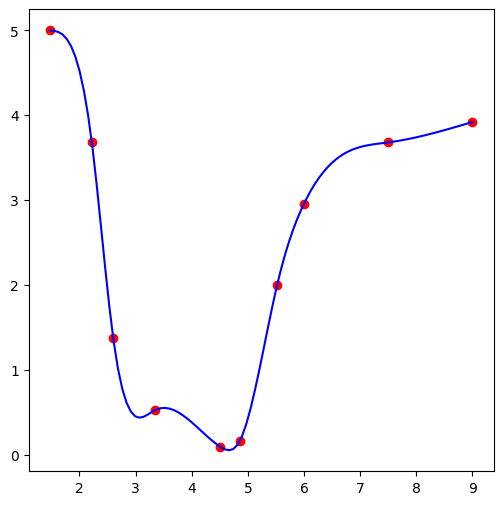

In [13]:
another_p =[1, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2]
 
another_X = [1.47,2.22,2.60,3.35,4.50,4.86,5.52,6.00,7.50,9.00]
another_Y = [5.00,3.68,1.38,0.53,0.10,0.17,2.00,2.96,3.68,3.92]
exp_spline.rebuild(another_X, another_Y, another_p)
exp_spline.print_spline()

In [14]:
exp_spline.Tense(10)

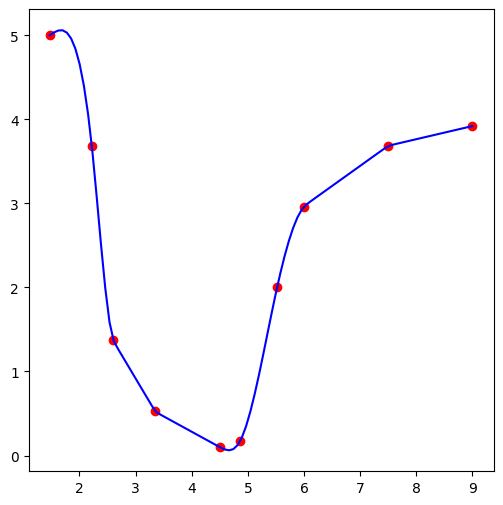

In [15]:
exp_spline.print_spline()